In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
#quandl:used to extract financial data
import quandl

In [5]:
data=pd.read_csv("/content/GOOG.csv")

In [6]:
data.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0.0,1.0


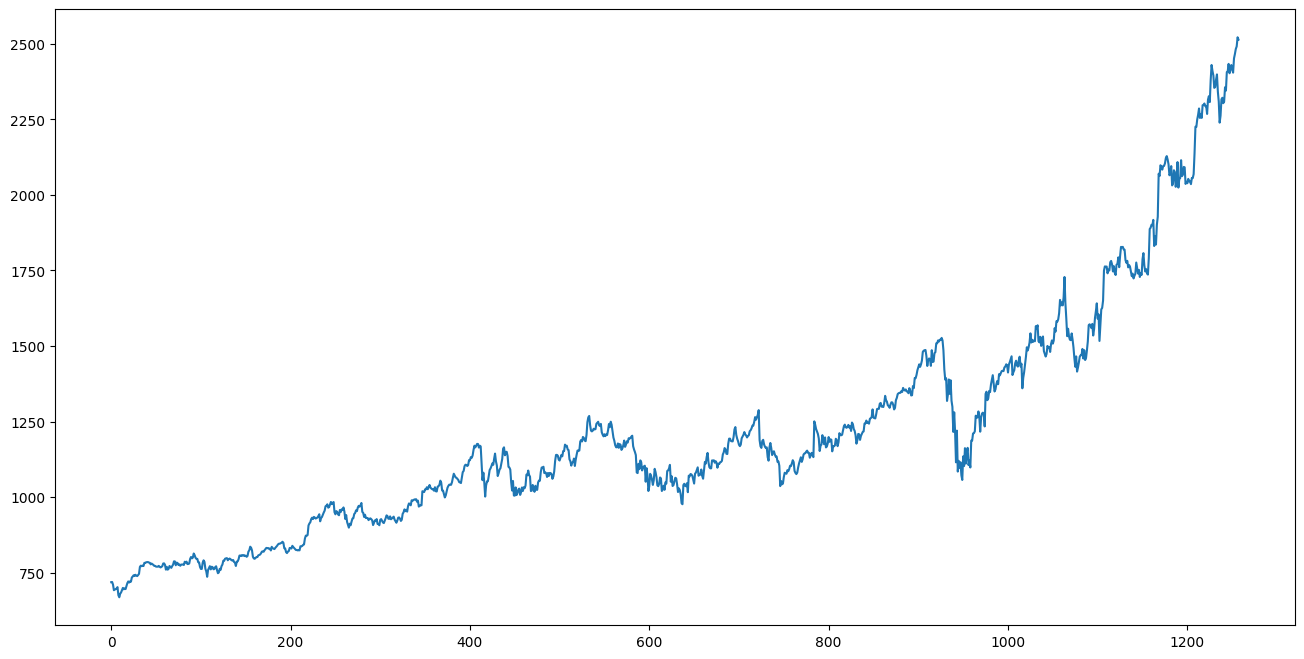

In [8]:
plt.figure(figsize=(16,8))
plt.plot(data['close'], label='Closing Price')

**Classification Problem: Buy or sell the stock**

Input features to predict whether customer should buy or sell the stock

In [9]:
#making new columns for finding differences between Open and close, and High and low
data['Open-Close']=data['open']-data['close']
data['High-low']=data['high']-data['low']
data=data.dropna()

In [10]:
x=data[['Open-Close','High-low']]
x.head()

,Open-Close,High-low
0,-1.79,9.3500
1,0.08,5.6700
2,4.55,13.3900
3,16.93,20.3685
4,5.06,9.0700


To store +1 for the buy signal and -1 for the sell signal

In [11]:
Y=np.where(data['close'].shift(-1)>data['close'],1,-1)
Y

array([ 1, -1, -1, ...,  1, -1, -1])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,Y,test_size=0.25)

Implementation of KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(X_train, y_train)

#accuracy score
accuracy_train=accuracy_score(y_train, model.predict(X_train))
accuracy_test=accuracy_score(y_test, model.predict(X_test))

print('Train data Accuracy: %.2f'%accuracy_train)
print('Test data Accuracy: %.2f'%accuracy_test)


Train data Accuracy: 0.64
Test data Accuracy: 0.52


In [14]:
predictions_classification=model.predict(X_test)

In [15]:
actual_predicted_data=pd.DataFrame({'Actual Class':y_test, 'Predicted Class':predictions_classification})

In [16]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,1,1
2,-1,-1
3,1,1
4,1,-1
5,1,1
6,-1,-1
7,-1,-1
8,1,1
9,-1,1


**Regression Problem: KNN**

In [22]:
y=data['close']
y

,close
0,718.27
1,718.92
2,710.36
3,691.72
4,693.71
...,...
1253,2466.09
1254,2482.85
1255,2491.40
1256,2521.60


Implementation of KNN regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg=train_test_split(x,y,test_size=0.25, random_state=44)

#using gridsearch to find the best parameter
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg, params, cv=5)

#fir the model and make predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions=model_reg.predict(X_test_reg)

In [18]:
print(predictions)

[ 0.46666667 -0.06666667 -0.06666667 -0.33333333  0.46666667 -0.33333333
 -0.2         0.06666667 -0.2         0.33333333 -0.33333333  0.06666667
 -0.33333333 -0.46666667  0.2         0.2         0.46666667 -0.2
 -0.2         0.06666667  0.2        -0.33333333  0.33333333  0.33333333
 -0.06666667  0.2        -0.06666667 -0.2        -0.33333333  0.06666667
  0.06666667 -0.2         0.46666667  0.06666667  0.06666667  0.06666667
  0.33333333 -0.06666667 -0.06666667  0.2         0.2         0.06666667
  0.06666667  0.2        -0.06666667  0.06666667  0.46666667  0.2
  0.6         0.2         0.2         0.46666667 -0.2         0.06666667
 -0.06666667  0.06666667  0.06666667  0.46666667 -0.33333333  0.2
  0.2         0.2         0.33333333  0.2        -0.06666667 -0.06666667
 -0.2         0.06666667  0.2        -0.33333333 -0.2        -0.06666667
 -0.2         0.06666667  0.06666667 -0.06666667  0.6        -0.06666667
  0.33333333 -0.33333333  0.33333333 -0.06666667  0.2        -0.06666667

In [28]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

1260.7623583466411

In [29]:
valid=pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})

In [30]:
valid.head(10)

,Actual Close,Predicted Close value
530,1205.50,1336.876667
427,1126.79,1294.232667
743,1116.46,1121.804667
920,1508.68,1537.816667
937,1319.04,1478.803333
1049,1518.45,1682.544667
963,1217.56,1716.308000
662,1116.37,1273.392667
486,1066.36,1003.092000
951,1102.49,1748.554667
